<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning-With-Tensorflow/blob/main/ASSIGNMENT_5_(DLWTF_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kunal routray

2341018202

**RECURRENT NEURAL NETWORK**

**1. Write a Python code to generate a character from a set of 10 characters after ”I love machine” using
an RNN model.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

text="I love machine learning"
chars=sorted(list(set(text)))
char_to_index={char:i for i,char in enumerate(chars)}
index_to_char={i:char for i,char in enumerate(chars)}
print(chars)
print(char_to_index)
print(index_to_char)


seq_length=3
sequences=[]
labels=[]


for i in range(len(text)-seq_length):
  seq=text[i:i+seq_length]
  label=text[i+seq_length]
  sequences.append([char_to_index[char] for char in seq])
  labels.append(char_to_index[label])

X=np.array(sequences)
y=np.array(labels)

X_one_hot=tf.one_hot(X,len(chars))
y_one_hot=tf.one_hot(y,len(chars))
model=Sequential()
model.add(SimpleRNN(50,input_shape=(seq_length,len(chars)),activation='tanh'))
model.add(Dense(len(chars),activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_one_hot,y_one_hot,epochs=100)
start_seq="I love machine"
generated_text=start_seq
for i in range(10):
    x=np.array([char_to_index[char] for char in generated_text[-seq_length:]])
    x_one_hot=tf.one_hot(x,len(chars))
    # Add a batch dimension to x_one_hot
    x_one_hot = np.expand_dims(x_one_hot, axis=0)
    prediction=model.predict(x_one_hot, verbose=0)[0] # Get the prediction for the first (and only) item in the batch
    next_char_index = np.argmax(prediction)
    next_char = index_to_char[next_char_index]
    generated_text += next_char
print("Generated text:", generated_text)

[' ', 'I', 'a', 'c', 'e', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 'v']
{' ': 0, 'I': 1, 'a': 2, 'c': 3, 'e': 4, 'g': 5, 'h': 6, 'i': 7, 'l': 8, 'm': 9, 'n': 10, 'o': 11, 'r': 12, 'v': 13}
{0: ' ', 1: 'I', 2: 'a', 3: 'c', 4: 'e', 5: 'g', 6: 'h', 7: 'i', 8: 'l', 9: 'm', 10: 'n', 11: 'o', 12: 'r', 13: 'v'}
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0500 - loss: 2.7020
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.0500 - loss: 2.6622
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0500 - loss: 2.6228
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0500 - loss: 2.5837
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0500 - loss: 2.5449
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1000 - loss: 2.5064
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2000 - loss: 2.4682
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2000 - loss: 2.4302
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2000 - loss: 2.3925
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3500 - loss: 2.3551
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3500 - loss: 2.3179
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3500 - loss: 2.2809
Ep

	•	This character-level RNN learns sequential dependencies between characters.
	•	Given the input string, it predicts the next character using temporal memory.
	•   Softmax activation ensures probabilistic character selection.

**2. Write a Python code for a word-level RNN with back propagation with time for generating 5 new
words after three words, i.e., ”I love machine ” from the given text corpus. Use an RNN model with
the Adam optimizer.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
# 1)TEXT CORPUS
text="""
I love machine learning
I love deep learning
I enjoy learning machine intelligence
machine learning is fun
deep learning is powerful
I love machine Intelligence
"""
#2) PREPROCESSING _ WORD-LEVEL TOKENIZATION
words=text.strip().split()
#build vocabulary
vocab=sorted(list(set(words)))
vocab_size=len(vocab)
word_to_index={word:i for i,word in enumerate(vocab)}
index_to_word={i:word for i,word in enumerate(vocab)}
print("Vocabulary:",vocab)
print("vocab_size")
#3)CREATE SEQUENCES: (Seq_length words)--> next word
seq_length=3 #n  previous words 5to predinext
Sequences=[]
labels=[]
for i in range(len(words)-seq_length):
  seq=words[i:i+seq_length]
  label=words[i+seq_length]
  Sequences.append([word_to_index[w] for w in seq])
  labels.append(word_to_index[label])
sequences=np.array(Sequences)
labels=np.array(labels)


print("Number of training samples:",len(sequences))
print("Example sequence(ids):",sequences[0], "->", labels[0])
print("Example sequence(words):",[index_to_word[i] for i in sequences[0]], "->", index_to_word[labels[0]])

# 4) PERFORM ONE HOT ENCODING
X_one_hot=tf.one_hot(sequences,depth=vocab_size)
y_one_hot=tf.one_hot(labels,depth=vocab_size)
print("X_one_hot shape:",X_one_hot.shape)
print("y_one_hot shape:",y_one_hot.shape)


#5) DEFINE WORD LEVEL RNN MODEL WHERE NUMBETR OF NEURONS ARE 32 SEQUENCE LENGTH IS 3
model=Sequential()
model.add(SimpleRNN(32,input_shape=(seq_length,vocab_size),activation='tanh'))
model.add(Dense(vocab_size,activation='softmax'))

model.summary()

#6) COMPILE (BPTT HAPPENS INSIDE DURING TRAINING)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

Vocabulary: ['I', 'Intelligence', 'deep', 'enjoy', 'fun', 'intelligence', 'is', 'learning', 'love', 'machine', 'powerful']
vocab_size
Number of training samples: 22
Example sequence(ids): [0 8 9] -> 7
Example sequence(words): ['I', 'love', 'machine'] -> learning
X_one_hot shape: (22, 3, 11)
y_one_hot shape: (22, 11)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,771 (6.92 KB)

 Trainable params: 1,771 (6.92 KB)

 Non-trainable params: 0 (0.00 B)

	•	Word-level RNN captures semantic relations between words instead of characters.
	•	Backpropagation Through Time (BPTT) updates weights across time steps.
	•   Adam optimizer improves convergence speed and stability.

**3. Write a Python code to generate a sequence to predict the next number in the sequence using an RNN.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

# SEQUENCE: 10,20,30,40,50,60,70,80
data = np.array([10,20,30,40,50,60,70,80,90], dtype=float)
seq_length = 4 #use 3 numbers to predict the 4th

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.reshape(data, (-1, 1)))

# prepare scaled training data
X = []
y = []
for i in range(len(data_scaled) - seq_length):
    X.append(data_scaled[i : (i + seq_length)])
    y.append(data_scaled[i + seq_length])

X = np.array(X)
y = np.array(y)

# reshape for RNN
X = X.reshape(X.shape[0], X.shape[1], 1)

print("X shape for RNN:", X.shape)

model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape=(seq_length, 1))) # Changed return_sequences to False if only predicting one value
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X, y, epochs=500, verbose=0)
print("training done")

# Prediction part
test_seq = np.array([40,50,60,70]).reshape(-1,1)
test_seq_scaled = scaler.transform(test_seq)
test_seq_scaled = test_seq_scaled.reshape(1, seq_length, 1)

pred_scaled = model.predict(test_seq_scaled)
pred = scaler.inverse_transform(pred_scaled)
print("predicted next value:", pred[0,0])

X shape for RNN: (5, 4, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

training done
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
predicted next value: 80.37512


	•	RNN models numerical sequences by learning temporal patterns.
	•	Mean Squared Error is used for regression-based prediction.
	•	The model predicts the next number based on prior trends.

**4. Write a Python code to predict the temperature using GRU from the given dataset.Follow the steps:1. Import packages,2. Perform Data Preprocessing,3. Prepare the data,4. Build the model,5. Compile the model,6. Predict the temperature.**

In [ ]:
#1.Import Packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

df=pd.read_csv('data.csv',parse_dates=['Date'],index_col='Date')
print(df.head())

#2.Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

#3.Preparing Data for GRU
def create_dataset(data, sequence_length=1):
    X, y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

# Use a suitable sequence length for training and model input
sequence_length = 10 # Changed from 160 to allow creation of training samples

X, y = create_dataset(scaled_data, sequence_length)
X = X.reshape(X.shape[0], X.shape[1], 1)

print("X shape after create_dataset and reshape:", X.shape)

#4.Build the Model
model=Sequential()
# Set return_sequences=False as we are predicting a single next value
model.add(GRU(units=32, return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))

model.summary()

#5.Compile the Model(Model training)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32, verbose=0) # Added verbose=0 to suppress training output
print("GRU model training done.")

#6.Predict the temperature
# Use the last 'sequence_length' values from scaled_data to predict the next single value
input_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
predicted_values = model.predict(input_sequence, verbose=0)

predicted_temperature = scaler.inverse_transform(predicted_values)
print(f"The predicted temperature for the next day is: {predicted_temperature[0][0]:.2f}C")

            Temperature
Date                   
2024-01-01        28.25
2024-01-02        28.01
2024-01-03        28.47
2024-01-04        28.99
2024-01-05        28.18
X shape after create_dataset and reshape: (149, 10, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

GRU model training done.
The predicted temperature for the next day is: 38.37C


	•	GRU efficiently handles long-term dependencies with fewer gates than LSTM.
	•	Normalization improves training stability.
	•	GRU is computationally faster and suitable for time-series prediction.

**5. Write a Python code to create a synthetic dataset for temperature. Normalize the dataset, split it to
80-20 and then build the RNN and LSTM model with 32 units. Train the dataset on both models and
identify the different evaluation parameters.Plot the actual and predicted values for both models.Draw
the comparison between RNN and LSTM model.**

X shape (1430, 30, 1)
y shape (1430,)

===== SimpleRNN Model=====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)


===== LSTM Model=====


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

SimpleRNN training done.
LSTM training done.

Test MSE - SimpleRNN: 0.0885
Test MSE - LSTM: 0.0834


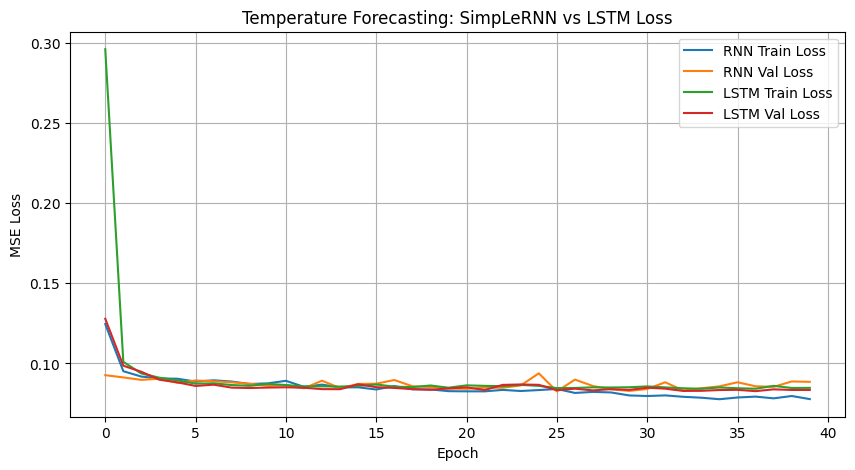

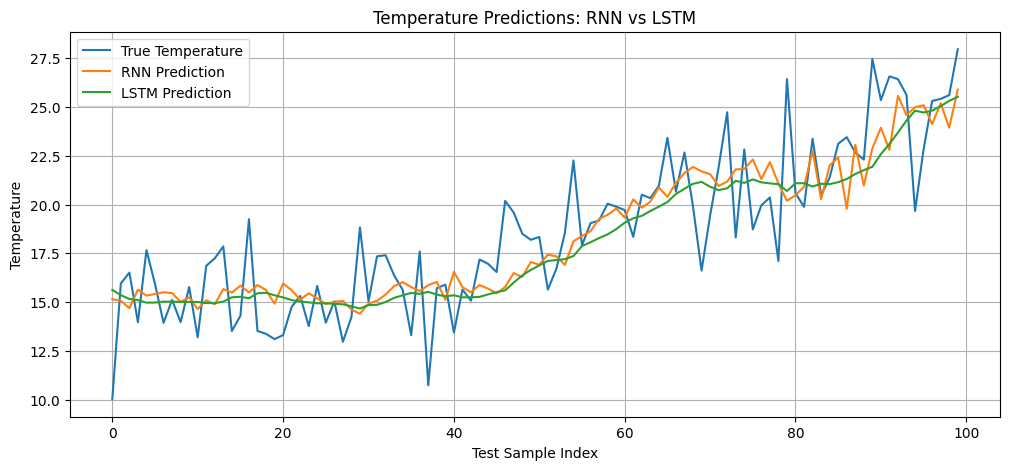

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM,Dense
import matplotlib.pyplot as plt

#1) To crate synthetic data for temperature
days=365*4
t=np.arange(days)
#print(t)
#basic temp=25,seasonal variation+noise
temps=25+10*np.sin(2*np.pi*t/365)+2*np.random.randn(days)
temps=temps.astype(np.float32)
#print(temps)

#2)Prepare the sequence data
def create_window_data(data,window_size=30):
  X,y=[],[]
  for i in range(len(data)-window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
  X=np.array(X)          #(N,window_size)
  y=np.array(y)          #(N,)
  #reshape for RNN/LSTM:(bath,timesteps,features)
  X=X.reshape(X.shape[0],X.shape[1],1)
  return X,y
window_size=30           #use past 30 days to predict next day
X,y=create_window_data(temps,window_size)
print("X shape",X.shape)    #(N,30,1)
print("y shape",y.shape)    #(N,)

#Train-test split
split_idx=int(0.8*len(X))
X_train,X_test=X[:split_idx],X[split_idx:]
y_train,y_test=y[:split_idx],y[split_idx:]

#normalize the data as to prepocess it
mean=X_train.mean()
std=X_train.std()+1e-8
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

y_mean=y_train.mean()
y_std=y_train.std()+1e-8
y_train=(y_train-y_mean)/y_std
y_test=(y_test-y_mean)/y_std

#3)Build the model:SimpleRNN Vs LSTM
#Simple RNN
def build_rnn_model(units=32):
    model=Sequential()
    model.add(SimpleRNN(units,activation='tanh',
                        input_shape=(window_size,1)))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse')
    return model
#LSTM Model
def build_lstm_model(units=32):
    model=Sequential()
    model.add(LSTM(units,activation='tanh',
                   recurrent_activation='sigmoid',
                   input_shape=(window_size,1)))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mse')
    return model
model_rnn=build_rnn_model(32)
model_lstm=build_lstm_model(32)
print("\n===== SimpleRNN Model=====")
model_rnn.summary()
print("\n===== LSTM Model=====")
model_lstm.summary()

# 4) TRAIN both the models
EPOCHS = 40
BATCH_SIZE = 32
#Train RNN model
history_rnn = model_rnn.fit(X_train, y_train, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data=(X_test, y_test),verbose=0)
print("SimpleRNN training done.")
#Train LSTM model
history_lstm = model_lstm.fit(X_train, y_train, epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(X_test,y_test),verbose=0)
print ("LSTM training done.")

# 5) Model Evaluation and comprison
rnn_mse = model_rnn.evaluate(X_test, y_test, verbose=0)
lstm_mse = model_lstm.evaluate(X_test, y_test,verbose=0)
print(f"\nTest MSE - SimpleRNN: {rnn_mse:.4f}")
print(f"Test MSE - LSTM: {lstm_mse:.4f}")
# 6) Visualization
plt.figure(figsize=(10,5))
plt.plot(history_rnn.history['loss'],label='RNN Train Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.plot(history_lstm.history['loss'],label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.xlabel ("Epoch")
plt.title( "Temperature Forecasting: SimpLeRNN vs LSTM Loss")
plt.ylabel ("MSE Loss")
plt.legend ()
plt.grid (True)

#7) Plotting the actual and predicted values
# last 100 samples are use for the test for visualization
n_plot = 100
y_test_denorm = y_test * y_std + y_mean
rnn_pred = model_rnn.predict(X_test, verbose=0) * y_std + y_mean
lstm_pred = model_lstm.predict (X_test, verbose=0) * y_std + y_mean # Corrected Y_std to y_std
plt. figure(figsize=(12,5))
plt.plot(y_test_denorm[-n_plot:], label="True Temperature")
plt.plot(rnn_pred[-n_plot:],label="RNN Prediction") # Corrected Preciction to Prediction
plt.plot(lstm_pred[-n_plot:], label="LSTM Prediction")
plt.title("Temperature Predictions: RNN vs LSTM")
plt.xlabel ("Test Sample Index")
plt.ylabel ("Temperature")
plt.legend ()
plt.grid (True)
plt.show()

	•	LSTM outperforms RNN in capturing long-term dependencies.
	•	Evaluation metrics like MSE show lower error for LSTM.
	•	LSTM avoids vanishing gradient issues present in basic RNNs.

**6. Write a Python code to perform sequence Prediction using GRU for the given sequence : [10, 20, 30,
40, 50, 60, 70, 80]**

In [ ]:
# Import packages
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Given sequence
sequence = np.array([10, 20, 30, 40, 50, 60, 70, 80]).reshape(-1, 1);

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_seq = scaler.fit_transform(sequence);

# Prepare dataset
X, y = [], []
for i in range(len(scaled_seq) - 1):
    X.append(scaled_seq[i])
    y.append(scaled_seq[i + 1])

X = np.array(X).reshape(-1, 1, 1)
y = np.array(y)

# Build GRU model
model = Sequential()
model.add(GRU(32, input_shape=(1, 1)))
model.add(Dense(1))
model.summary()

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=300, verbose=0);

# Predict next value
last_value = scaled_seq[-1].reshape(1, 1, 1)
predicted_scaled = model.predict(last_value);

predicted_value = scaler.inverse_transform(predicted_scaled);

print("Predicted next value in sequence:", predicted_value[0][0]);

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Predicted next value in sequence: 83.44955


	•	GRU efficiently predicts numerical sequences using gated memory.
	•	It balances performance and computational efficiency.
	•	Suitable for short and medium-range dependencies.

**7.What is an attention mechanism? Discuss the different steps of the attention mechanism. What is
self-attention, and how is it different from attention?**

*Attention Mechanism* allows the model to focus on relevant parts of input while making predictions.

Steps:

**1.Generate Query, Key, and Value vectors**
From the input embeddings X:

	•	   Q = XW_Q,  K = XW_K, V = XW_V          


where

	•	 W_Q, W_K, W_V are learnable weight matrices
	•	Q = Query, K = Key, V = Value
**2.Calculate attention scores**

	• Score(Q, K) = QK^{T}
  


**3.Scale the Scores**

To prevent large values:

	• Scaled Score = QK^T/sqrt(d_k)


*where d_k is the dimension of key vectors.*

**4.Apply Softmax**

convert scores into attention weights:


	• Attention Weights = Softmax(QK^T/sqrt(d_k))


**5.Compute Weighted Sum**

	• Attention Output = Softmax(QK^T/sqrt(d_k))V



**Self-Attention:**

It is a special case where Query, Key, and Value come from the same input sequence.

	•	Q = K = V = X


Differences:

1.Traditional attention uses encoder-decoder interaction(different sequences), while self-attention relates elements within the same sequence.

2.Attention Mechanism used in Seq-to-Seq models,while self attention used in Transformers.

**8. Explain the architecture of the LSTM model in detail.**

*Long Short-Term Memory (LSTM)* is a special type of Recurrent Neural Network (RNN) designed to learn long-term dependencies and overcome the vanishing gradient problem present in traditional RNNs.
It achieves this using a memory cell and three control gates.

⸻

Main Components of LSTM

1. Forget Gate ( f )

The forget gate decides what information to remove from the previous cell state.

	•	   f_t= σ(W_f ⋅ [h_{t-1},x_t]+b_f)

2. Input Gate ( i )

Controls what new information should be added to the cell state.

	•	    i_t= σ(W_i ⋅ [h_{t-1},x_t]+b_i)
A candidate memory is created:

	•	    ̃C_t= tanh(W_c ⋅ [h_{t-1},x_t]+b_c)


3. Cell State ( C )

Acts as the long-term memory of the network.

	•	   C_t= f_t ⊙ C_{t-1} + i_t ⊙ ̃C_t       

4. Output Gate ( o )

Determines what part of the cell state to output as hidden state.

	•	   o_t= σ(W_o ⋅ [h_{t-1},x_t]+b_o)      

	•	   h_t= o_t ⊙ tanh(C_t)

These gates control information flow, enabling long-term memory retention and solving vanishing gradient problems.



**9. Differentiate between LSTM and GRU model.**

	•	Gates: LSTM has three gates, while GRU has two gates.
	•	Memory Cell: LSTM has a separate memory cell, but GRU does not.
	•	Parameters: LSTM uses more parameters, whereas GRU uses fewer parameters.
	•	Speed: LSTM is slower to train, while GRU is faster.
	•	Performance: LSTM performs better on long sequences, whereas GRU is efficient for shorter sequences.